<a href="https://colab.research.google.com/github/djwalker907/djwalker907.github.io/blob/main/03_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%EC%9D%98_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

활성화 함수의 역할
- 비선형성을 부여

다층으로 모델을 쌓는다는 것은?
- 비선을 복합적으로 수행 -> 복잡한 패던을 인식하게 한다

----

# 활성화 함수의 종류

- Relu 계열
- Sigmoid
- 하이퍼볼릭탄젠트
- 소프트맥스

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NumPy의 linspace 함수를 사용해서 -10부터 10까지의 구간을 100개의 숫자로 나누어  
그 숫자들을 x라는 배열에 저장
즉, -10에서 10까지 균등한 간격으로 100개의 값이 들어 있는 1차원 배열을 생성

In [2]:
x = np.linspace(-10, 10, 100)
print(x.shape)
print(x)

(100,)
[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5

# Relu

  - 수식: $$
\operatorname{ReLU}(x)=\max (0, x)
$$

In [3]:
def relu(x):
    return np.maximum(0, x)

배열 x의 각 원소와 0을 비교해서, 둘 중 더 큰 값을 반환하는 새로운 배열 생성  
즉, x의 값이 0보다 크면 그 값을 그대로, 0보다 작으면 0으로 바꿔서 반환  
이 방식은 ReLU(Rectified Linear Unit) 활성화 함수와 동일하게 동작함

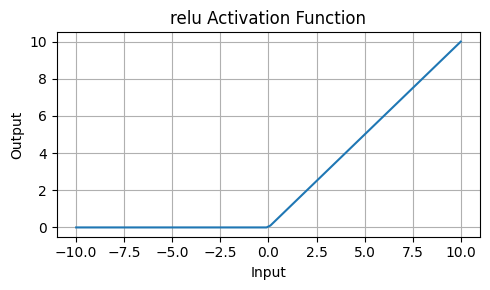

In [4]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, relu(x), label='relu')
plt.title('relu Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()


   - 출력 범위: [0, ∞)
   - 설명:   
   > 입력 값이 양수일 경우 그대로 출력하고, 음수일 경우 0을 출력합니다.   
   계산이 간단하고 그래디언트 소실 문제가 적어 최근 많이 사용되는 활성화 함수입니다.  
   문제점: 음수 구간에서 기울기가 0이 되므로, 학습 중 특정 뉴런이 죽어버리는 'Dying ReLU 문제'가 발생할 수 있음

# ReLU 계열 - Leaky ReLu

**Leaky ReLU 함수**:
   - 수식: $$
\text { Leaky } \operatorname{ReLU}(x)= \begin{cases}x & \text { if } x>0 \\ \alpha x & \text { if } x \leq 0\end{cases}
$$

In [5]:
def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, x * alpha)

배열 x의 각 원소에 대해:  
조건: x > 0 (즉, 원소가 0보다 크면)  
- 참일 때: 그 값을 그대로 사용 (x)  
- 거짓일 때: 그 값을 alpha와 곱해서 사용 (x * alpha)  
즉, x의 값이 양수면 그대로, 음수나 0이면 alpha를 곱해서 반환하는 새로운 배열 생성  
이 방식은 Leaky ReLU 활성화 함수와 동일하게 동작함  
Leaky ReLU는 음수 영역에서 완전히 0으로 만들지 않고, 작은 기울기(alpha)를 곱함

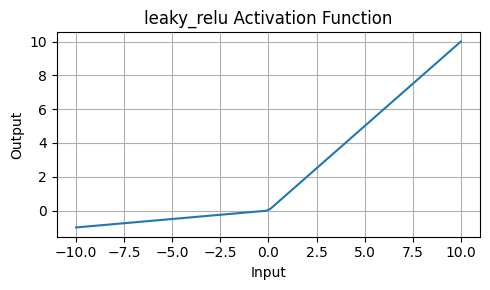

In [6]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, leaky_relu(x), label='leaky_relu')
plt.title('leaky_relu Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()

입력값이 음수일대, 작은 기울기를 유지
- Dead ReLU

----

# ReLU계열 - PReLU

**Parametric ReLU 함수 (PReLU)**:
   - 수식: $$
\operatorname{PReLU}(x)= \begin{cases}x & \text { if } x>0 \\ \alpha x & \text { if } x \leq 0\end{cases}
$$


In [8]:
def prelu(x, alpha=0.05):
    return np.where(x > 0, x, x * alpha)

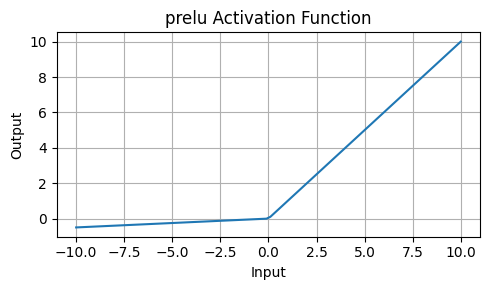

In [9]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, prelu(x), label='prelu')
plt.title('prelu Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()

   - 설명:   
   > Leaky ReLU와 비슷하지만, 음수 입력에 대한 기울기 $\alpha$를 학습합니다.  
$\alpha$는 고정된 값이 아니라 학습되는 파라미터로서, 음수 구간의 기울기를 조절함  
'Dying ReLU 문제'를 완화하여 더 많은 뉴런이 학습에 기여하도록 도움  
데이터셋이 클 때 ReLU보다 성능이 좋아질 수 있으나, 학습 파라미터가 늘어나 모델 복잡성이 증가

# ReLU계열 - elu

In [10]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))


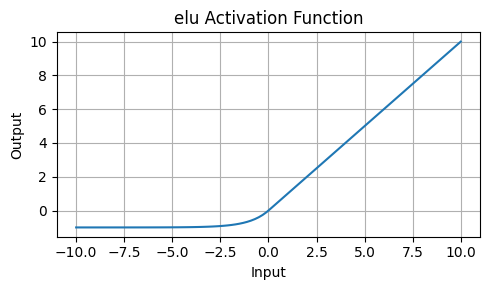

In [11]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, elu(x), label='elu')
plt.title('elu Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()

# ReLU계열 - gelu

In [12]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))


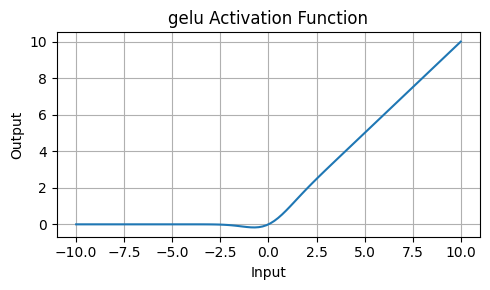

In [13]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, gelu(x), label='gelu')
plt.title('gelu Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()

---

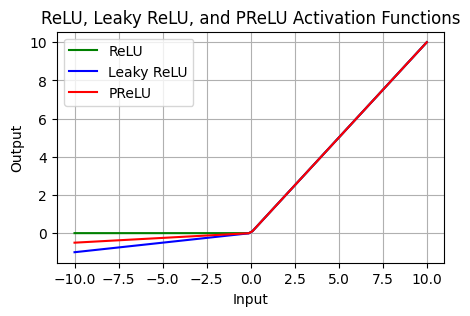

In [14]:
# ReLU 계열함수 시각화
plt.figure(figsize=(5, 3))
plt.plot(x, relu(x), label='ReLU', color='green')
plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='blue')
plt.plot(x, prelu(x), label='PReLU', color='red')
plt.title('ReLU, Leaky ReLU, and PReLU Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

---

 # **시그모이드 함수 (Sigmoid Function)**:
   - 수식: $$
\sigma(x)=\frac{1}{1+e^{-x}}
$$
   - 출력 범위: (0, 1)

In [15]:
# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

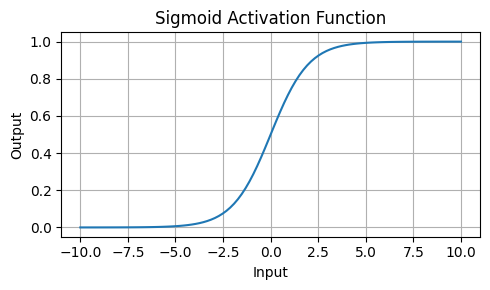

In [16]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

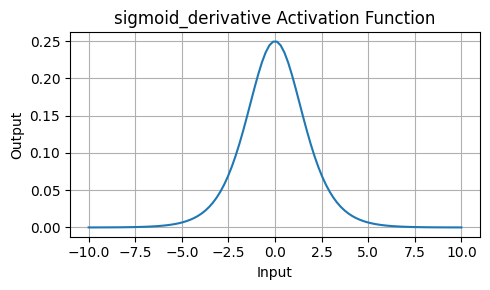

In [18]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, sigmoid_derivative(x), label='sigmoid_derivative')
plt.title('sigmoid_derivative Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()


   - 설명:  
>  입력 값을 0과 1 사이로 변환합니다.  
 (출력층에서)출력이 확률처럼 해석될 수 있기 때문에 이진 분류 문제에 자주 사용됩니다.     
 그러나 큰 입력 값이나 작은 입력 값에 대해 그래디언트 소실 문제가 발생할 수 있습니다.  

**하이퍼볼릭 탄젠트 함수 (Tanh Function)**:
   - 수식: $$
\tanh (x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}
$$

In [19]:
def tanh(x):
    return np.tanh(x)

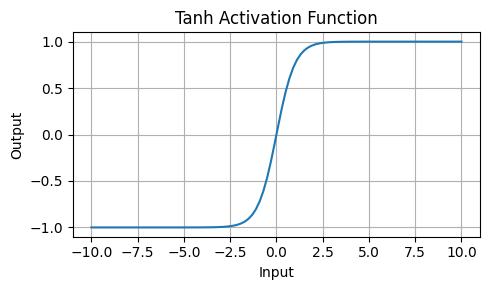

In [21]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, tanh(x), label='tanh')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

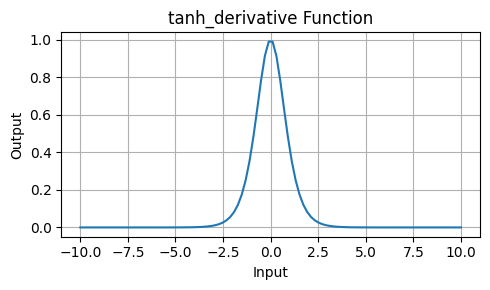

In [ ]:
#plt.subplot(4, 1, 1)
plt.figure(figsize=(5, 3))
plt.plot(x, tanh_derivative(x), label='tanh_derivative')
plt.title('tanh_derivative Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.tight_layout()
plt.show()

- 출력 범위: (-1, 1)
   - 설명:   
   > 입력 값을 -1과 1 사이로 변환합니다.   
   시그모이드 함수와 비슷하지만 출력이 중심 대칭적이어서 종종 시그모이드 함수보다 더 나은 성능을 보입니다.  
   역전파 최대값 차이로 인해 탄젠트가 좀 더 나은 성능을 보임"

----

# Softmax

   - 수식: $$
\operatorname{softmax}\left(x_i\right)=\frac{e^{x_i}}{\sum_j e^{x_j}}
$$

In [ ]:
# 소프트맥스 함수
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

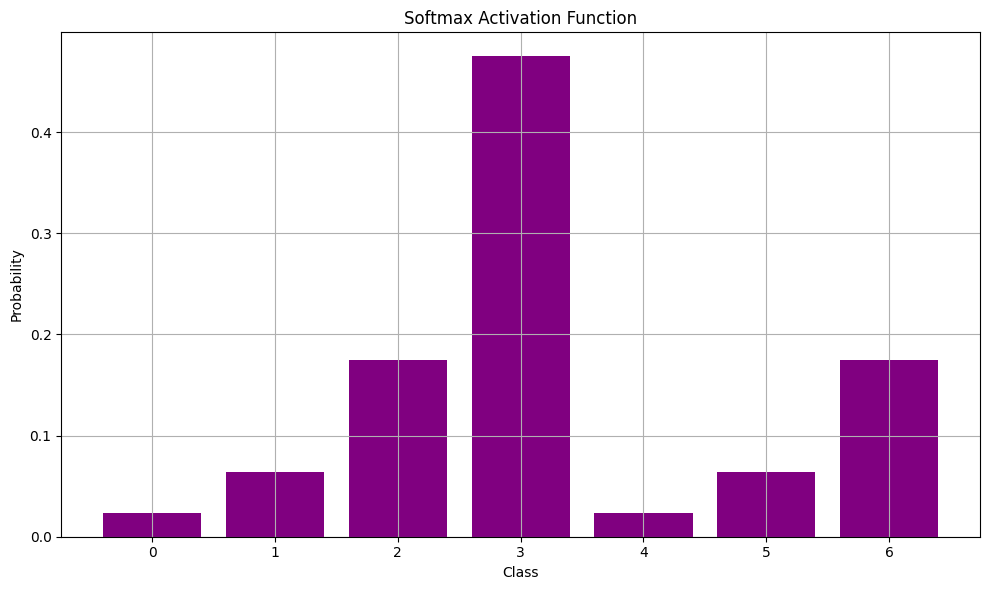

In [ ]:
# 소프트맥스 함수는 여러 입력 값에 대해 적용되므로 간단한 예시로 시각화
plt.figure(figsize=(10, 6))
softmax_input = np.array([1, 2, 3, 4, 1, 2, 3])
softmax_output = softmax(softmax_input)
plt.bar(range(len(softmax_input)), softmax_output, color='purple')
plt.title('Softmax Activation Function')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.grid(True)

plt.tight_layout()
plt.show()


여섯개의 클래스로 분류했을때, 3번 확률이 높음으로 최종 출력은 : 3

- 분류 문제일때, 맨 마지막 층에만 사용이 된다